In [1]:
import numpy as np                      # I use this for maths and sometimes arrays.
                                        # "np" is just an abbreviation since we call this package so often!
import pylab                            # I use this for arrays and plotting
import matplotlib                       # Another plotting package
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # If there is a task you use a lot, importing it like this 
                                         # keeps you from having to constantly type "matplotlib.gridspec"
                                        # every time you call that task!
        
import scipy
import astropy.io.fits as fits          # I use this to import FITS images. 
                                        # Astropy should be included in your conda installation
from astropy.wcs import WCS             # This one helps us add coordinates to images
import pyspeckit as psk                 # I use this to do spectral line fitting
                                        #Anna: Had to install using an anaconda terminal window, its located at Users\Anna\AppData\Local\pip

from astropy.nddata import Cutout2D     #To make image cut outs

    
# Super important: This embeds plots in the Jupyter window (instead of showing them as pop-ups)
%matplotlib inline                             

#Set plot fonts
matplotlib.rc('text', usetex=True) #Change to True later if Latex is installed
matplotlib.rc('font', family='sans-serif')


In [2]:
# This file is the Band 7 (850 micron/ 350 GHz) continuum

path1 = 'ngc253_cont_image.fits'
image1 = fits.getdata(path1)  # This command reads in the data array part of the fits file, so we can manipulate it 
header1 = fits.getheader(path1) # Reads in the header, which consists of a series of variables and associated values

print(header1) #You can print the entire header just to see its contents

w = WCS(header1)      # This command grabs information from the header, but focuses just on the
                            # the part of the header that tells you how pixel coordinates correspond to 
                            # sky coordinates
print(w)
print("The current image shape is: ", np.shape(image1))  # This command tells us how many dimensions the image data has, 
                                                        # and the number of pixels along each axis
#There aren't extra axes for this file, so I can skip the steps from the tutorial getting rid of them and squeezing it



SIMPLE  =                    T /Standard FITS                                   BITPIX  =                   16 /Short integer (16 bit)                          NAXIS   =                    2                                                  NAXIS1  =                 2500                                                  NAXIS2  =                 1500                                                  EXTEND  =                    T                                                  BSCALE  =   7.151768930766E-07 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   2.267262490932E-02                                                  BLANK   =               -32768 /Pixels with this value are blank                DATAMIN =       -7.6157635E-04                                                  DATAMAX =        4.6106827E-02                                                  BMAJ    =   4.264287236664E-05                                                  BMIN    =   3.345079306099E-05          

PC01_01 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_02 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
'obsfix' made the change 'Set OBSGEO-L to   -67.754929 from OBSGEO-[XYZ].
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.


In [3]:
# This file is higher-resolution version of the same data

path2 = 'ngc253_cont_super.fits'
image2 = fits.getdata(path2)  
header2 = fits.getheader(path2)

print(header2) #You can print the entire header just to see its contents

ww = WCS(header2) 
print(ww)
print("The current image shape is: ", np.shape(image2))

#Can see from the header and image shape that we need to get rid of two of the four axes like in the tutorial
ww = ww.dropaxis(3) #NAXIS 4
ww = ww.dropaxis(2) #NAXIS 3
image_2D = pylab.squeeze(image2) #gets rid of axes with length 1


#Now check the image shape again:
print("The new image shape is: ", np.shape(image_2D))



SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                 2500                                                  NAXIS2  =                 1500                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   3.069593053725E-05                                                  BMIN    =   2.499944219987E-05                                                  BPA     =  -6.239358901978E+01          

PC03_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC04_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC04_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_03 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_03 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_03 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC04_03 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_04 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_04 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_04 = 0.000000000000E+00 
indices in parameterized keywo

In [4]:
# Defining the WCS also lets us take a set of coordinates and change it from pixels to sky coordinates and vice versa.
# For example, let's figure out the RA and Dec at a position near the center of the image: x=144, y=144

RA, Dec = w.all_pix2world(144,144,0)

print(RA,Dec) #Notice that these are given in units of degrees

11.894712532599367 -25.29169984433775


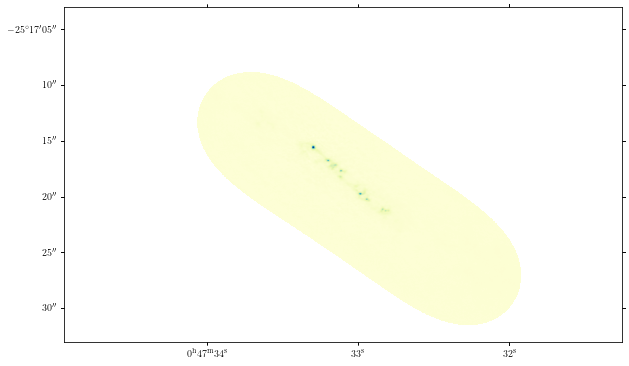

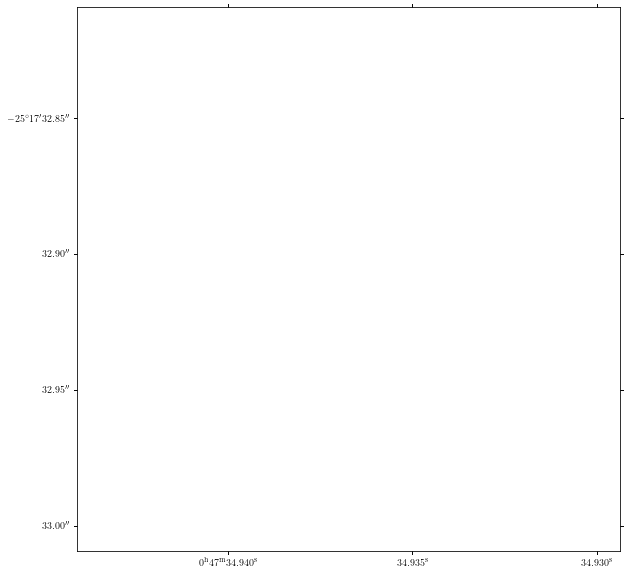

In [5]:
fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=w)
im1 = pylab.imshow(image1,cmap='YlGnBu') #Changed color map from 'Greys' because this is prettier

#To make a cut out of the image:
cutout = Cutout2D(image_2D, (256,256), (10, 10), wcs=ww)

fig2 = pylab.figure(2,figsize=(10,10))
ax2 = pylab.subplot(projection=w)
#ax2 = pylab.subplot()
#plt.xlim(1000, 1400)
#plt.ylim(1000, 600)
#im2 = pylab.imshow(image_2D,cmap='YlGnBu') #non cut out
im2 = pylab.imshow(cutout.data,cmap='YlGnBu') #cutout

#Cutout notes from Betsy: 
#The first argument is the (x,y) coordinate of your new image center. The second argument is the (width,height) of your cutout
#The new image is stored in cutout.data and the new WCS is stored in cutout.wcs



PC01_01 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_02 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_03 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_03 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC03_03 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
'obsfix' made the change 'Set OBSGEO-L to   -67.754929 from OBSGEO-[XYZ].
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (81, 1536, 1800)

Pixel Dim  Data size  Bounds
        0       1800  None
        1       1536  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


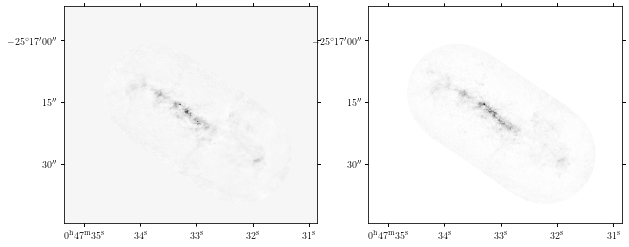

In [6]:
#Data Cube time!

cube_path = 'ngc253_co32_hires_common.fits'   
cube = pylab.squeeze(fits.getdata(cube_path))   # here we are skipping a step and getting rid of the 4th image axis 
                                            # (Stokes) since it still doesn't have data and we don't need it. 
cheader = fits.getheader(cube_path) 

#A map of the maximum value corresponding to each pixel:
maxval = np.nanmax(cube,axis=0)

#Get header info:
w = WCS(cheader) 
w = w.dropaxis(2)
print(w)
#print("The current image shape is: ", np.shape(cube)) #can see no extra axes, so don't need to 'dropaxis' anything

#Moment Zero
mom_0 = np.nansum(cube,axis=0)

#Figure time
fig2 = pylab.figure(2,figsize=(10,5))
ax2 = pylab.subplot(1,2,1,projection=w) # Since we are looking at the same object, we can keep our WCS information
im2 = pylab.imshow(mom_0,cmap='Greys')
ax3 = pylab.subplot(1,2,2, projection=w)
im3=pylab.imshow(maxval,cmap='Greys')

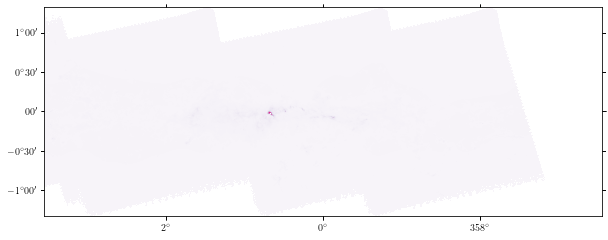

In [7]:
#Galactic center time! H2 column density map: 

#Read in the file and get the image and header data:
H2_path = 'gcmosaic_column_conv36.fits'
H2_image = fits.getdata(H2_path)
H2_header = fits.getheader(H2_path)
#Check contents
#print(H2_header)

#Get WCS stuff
H2_w = WCS(H2_header)
#print(H2_w)
#print("The current image shape is: ", np.shape(H2_image)) #Just 2 axes, shouldn't need to dropaxis or squeeze

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=H2_w)
im1 = pylab.imshow(H2_image,cmap='PuRd')

#Note to self: figure out how to zoom in !!

PC01_01 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_01 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC01_02 = 0.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.
PC02_02 = 1.000000000000E+00 
indices in parameterized keywords must not have leading zeroes.


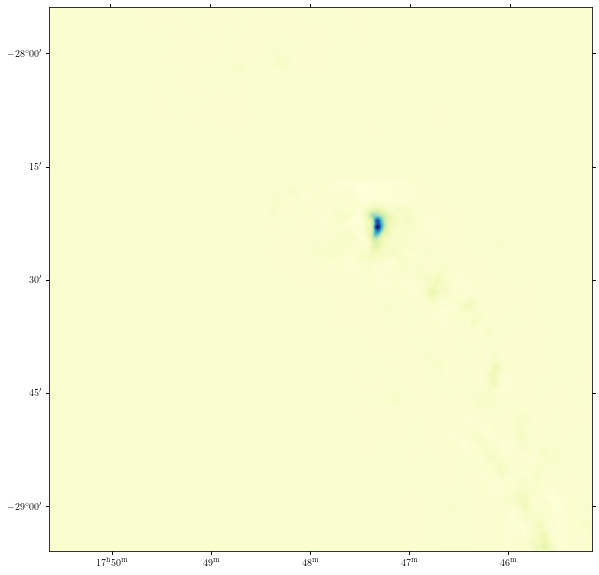

In [8]:
#450 micron Galactic center dust map

#Read in the file and get the image and header data:
dust_path = 'better_450_smooth36.fits'
dust_image = fits.getdata(dust_path)
dust_header = fits.getheader(dust_path)
#Check contents
#print(dust_header)

#Get WCS stuff
dust_w = WCS(dust_header)
#print(dust_w)
#print("The current image shape is: ", np.shape(dust_image)) # Two axes, so all good 

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=dust_w)
im1 = pylab.imshow(dust_image,cmap='YlGnBu')


RADECSYS= 'FK5 ' / Reference frame for RA/DEC values 
the RADECSYS keyword is deprecated, use RADESYSa.
'datfix' made the change 'Set MJD-OBS to 50910.000000 from DATE-OBS.
Changed DATE-OBS from '07/04/98' to '1998-04-07''.


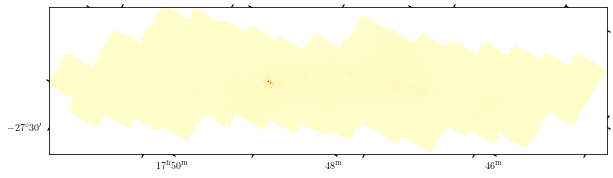

In [9]:
#850 micron dust map for GC:


#Read in the file and get the image and header data:
dust2_path = 'SCUBA_850micron.fits'
dust2_image = fits.getdata(dust2_path)
dust2_header = fits.getheader(dust2_path)
#Check contents
#print(dust2_header)

#Get WCS stuff
dust2_w = WCS(dust2_header)
#print(dust2_w)
#print("The current image shape is: ", np.shape(dust2_image)) # Two axes, so all good 

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=dust2_w)
im1 = pylab.imshow(dust2_image,cmap='YlOrRd')


MJD-OBS = '2007-08-18T01:16:06' / time of observation 
a floating-point value was expected.


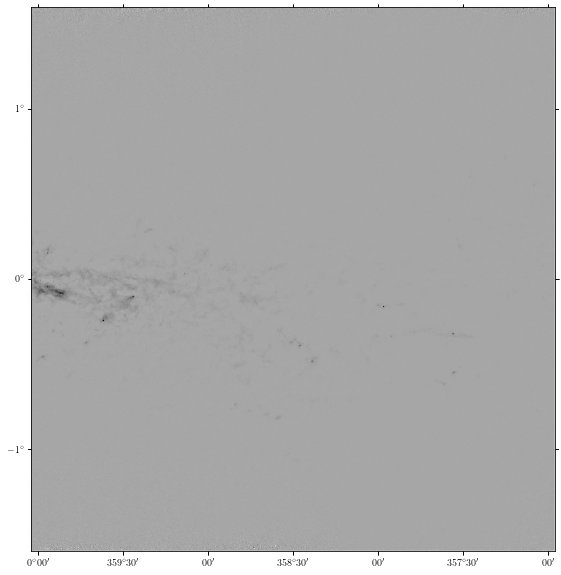

In [11]:
#Alternate 850 micron map: 

#Read in the file and get the image and header data:
dust3_path = 'ATLASGAL.-1.5.fits'
dust3_image = fits.getdata(dust3_path)
dust3_header = fits.getheader(dust3_path)
#Check contents
#print(dust3_header)

#Get WCS stuff
dust3_w = WCS(dust3_header)
#print(dust3_w)
#print("The current image shape is: ", np.shape(dust3_image)) # Two axes, so all good 

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=dust3_w)
im1 = pylab.imshow(dust3_image,cmap='Greys')
